In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
np.set_printoptions(precision=3)
from sklearn.feature_selection import r_regression
from scipy.stats import skew, kurtosis

In [3]:
# Load full data and split the dataset into feature matrix X and label vector y
df = pd.read_csv('./Data.csv')
X, y = df.drop('Class', axis=1),  df['Class']
df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,NaN,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
df.shape


(1000, 21)

1000 instances, 20 features, 1 target class

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Att1    935 non-null    object
 1   Att2    1000 non-null   int64 
 2   Att3    1000 non-null   object
 3   Att4    1000 non-null   object
 4   Att5    1000 non-null   int64 
 5   Att6    1000 non-null   object
 6   Att7    1000 non-null   object
 7   Att8    1000 non-null   int64 
 8   Att9    1000 non-null   object
 9   Att10   1000 non-null   object
 10  Att11   1000 non-null   int64 
 11  Att12   1000 non-null   object
 12  Att13   1000 non-null   int64 
 13  Att14   1000 non-null   object
 14  Att15   1000 non-null   object
 15  Att16   1000 non-null   int64 
 16  Att17   1000 non-null   object
 17  Att18   1000 non-null   int64 
 18  Att19   1000 non-null   object
 19  Att20   1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


From the 20 features, there are 7 numerical features and 13 categorical features.


In [6]:
df.describe()

,Att2,Att5,Att8,Att11,Att13,Att16,Att18,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [7]:
df.describe(include = object)

,Att1,Att3,Att4,Att6,Att7,Att9,Att10,Att12,Att14,Att15,Att17,Att19,Att20
count,935,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,374,530,280,603,339,548,907,332,814,713,630,596,963


In [8]:
df.head()


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
df_num = df[['Att2', 'Att5', 'Att8','Att11','Att13','Att16','Att18','Class']]
df_num.corr()
##df_num.corr().abs()

,Att2,Att5,Att8,Att11,Att13,Att16,Att18,Class
Att2,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
Att5,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
Att8,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
Att11,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
Att13,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
Att16,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
Att18,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
Class,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


Att2,Att5 and Att13 have the highest correlation with the target variable


(array([ 82.,  12.,  77., 188.,   8.,  66., 113.,   8.,  32., 184.,  14.,
          3.,  40.,   3.,   0.,  83.,   6.,  11.,   0.,   5.,  49.,   0.,
          0.,   2.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,   1.]),
 array([ 4.   ,  6.125,  8.25 , 10.375, 12.5  , 14.625, 16.75 , 18.875,
        21.   , 23.125, 25.25 , 27.375, 29.5  , 31.625, 33.75 , 35.875,
        38.   , 40.125, 42.25 , 44.375, 46.5  , 48.625, 50.75 , 52.875,
        55.   , 57.125, 59.25 , 61.375, 63.5  , 65.625, 67.75 , 69.875,
        72.   ]),
 <BarContainer object of 32 artists>)

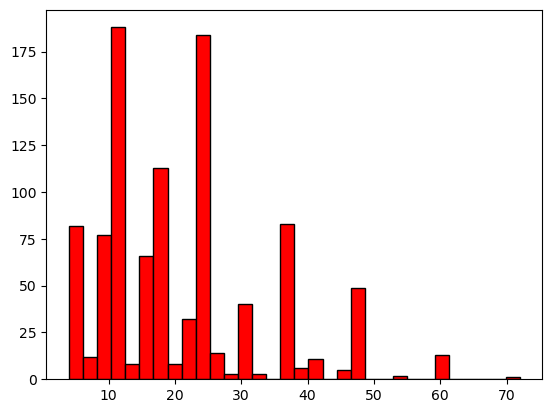

In [10]:
plt.hist(df_num['Att2'], bins = 32, color ='r', edgecolor = 'k')

In [11]:
import scipy as scp
print(scp.stats.skew(df_num['Att2']))
print(scp.stats.kurtosis(df_num['Att2']))

1.0925422109540106
0.9091948811374047


(array([ 78., 182., 161., 121.,  95.,  80.,  51.,  36.,  24.,  17.,  31.,
         20.,  22.,  16.,  10.,   9.,   6.,   6.,   6.,   4.,   5.,   5.,
          2.,   1.,   4.,   3.,   0.,   4.,   0.,   0.,   0.,   1.]),
 array([  250.   ,   817.938,  1385.875,  1953.812,  2521.75 ,  3089.688,
         3657.625,  4225.562,  4793.5  ,  5361.438,  5929.375,  6497.312,
         7065.25 ,  7633.188,  8201.125,  8769.062,  9337.   ,  9904.938,
        10472.875, 11040.812, 11608.75 , 12176.688, 12744.625, 13312.562,
        13880.5  , 14448.438, 15016.375, 15584.312, 16152.25 , 16720.188,
        17288.125, 17856.062, 18424.   ]),
 <BarContainer object of 32 artists>)

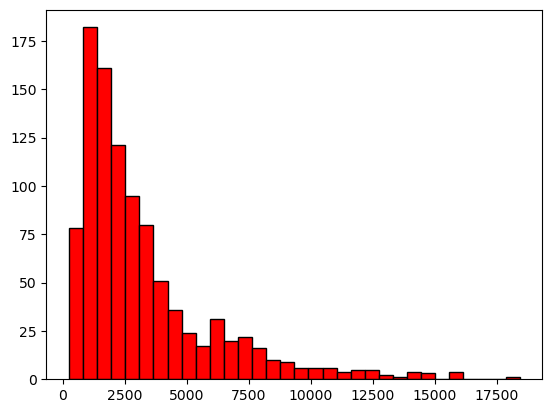

In [12]:
plt.hist(df_num['Att5'], bins = 32, color ='r', edgecolor = 'k')

In [13]:
print(scp.stats.skew(df_num['Att5']))
print(scp.stats.kurtosis(df_num['Att5']))

1.946702018941924
4.265163377213492


(array([ 16.,  41.,  92.,  41., 101.,  80.,  78.,  34.,  65.,  79.,  53.,
         21.,  42.,  39.,  32.,  18.,  29.,  26.,  17.,   7.,  18.,  12.,
          8.,   6.,   9.,  13.,  10.,   3.,   3.,   1.,   0.,   6.]),
 array([19.  , 20.75, 22.5 , 24.25, 26.  , 27.75, 29.5 , 31.25, 33.  ,
        34.75, 36.5 , 38.25, 40.  , 41.75, 43.5 , 45.25, 47.  , 48.75,
        50.5 , 52.25, 54.  , 55.75, 57.5 , 59.25, 61.  , 62.75, 64.5 ,
        66.25, 68.  , 69.75, 71.5 , 73.25, 75.  ]),
 <BarContainer object of 32 artists>)

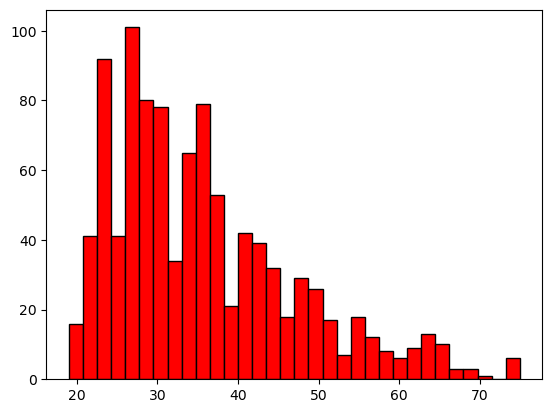

In [14]:
plt.hist(df_num['Att13'], bins = 32, color ='r', edgecolor = 'k')

In [15]:
print(scp.stats.skew(df_num['Att13']))
print(scp.stats.kurtosis(df_num['Att13']))

1.019207521364841
0.5868108307295379


(array([700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1.   , 1.031, 1.062, 1.094, 1.125, 1.156, 1.188, 1.219, 1.25 ,
        1.281, 1.312, 1.344, 1.375, 1.406, 1.438, 1.469, 1.5  , 1.531,
        1.562, 1.594, 1.625, 1.656, 1.688, 1.719, 1.75 , 1.781, 1.812,
        1.844, 1.875, 1.906, 1.938, 1.969, 2.   ]),
 <BarContainer object of 32 artists>)

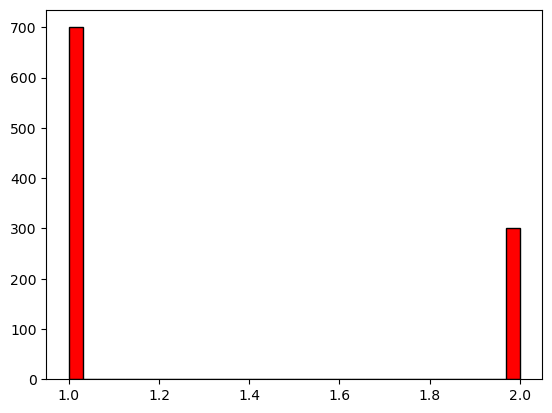

In [16]:
plt.hist(df_num['Class'], bins = 32, color ='r', edgecolor = 'k')

In [17]:
df.isnull().sum()

Att1     65
Att2      0
Att3      0
Att4      0
Att5      0
Att6      0
Att7      0
Att8      0
Att9      0
Att10     0
Att11     0
Att12     0
Att13     0
Att14     0
Att15     0
Att16     0
Att17     0
Att18     0
Att19     0
Att20     0
Class     0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)]

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Class
7,NaN,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
13,NaN,24,A34,A40,1199,A61,A75,4,A93,A101,...,A123,60,A143,A152,2,A172,1,A191,A201,2
20,NaN,9,A34,A40,2134,A61,A73,4,A93,A101,...,A123,48,A143,A152,3,A173,1,A192,A201,1
67,NaN,12,A32,A40,1007,A64,A73,4,A94,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
87,NaN,36,A32,A46,12612,A62,A73,1,A93,A101,...,A124,47,A143,A153,1,A173,2,A192,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,NaN,12,A32,A40,2002,A61,A74,3,A93,A101,...,A122,30,A143,A151,1,A173,2,A192,A201,1
956,NaN,30,A34,A43,3656,A65,A75,4,A93,A101,...,A122,49,A142,A152,2,A172,1,A191,A201,1
980,NaN,30,A34,A42,8386,A61,A74,2,A93,A101,...,A122,49,A143,A152,1,A173,1,A191,A201,2
989,NaN,24,A34,A43,1743,A61,A75,4,A93,A101,...,A122,48,A143,A152,2,A172,1,A191,A201,1
